<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" />
    
    
### <font color='navy'> Modelos no lineales para pronósticos.

**Nombres:**
- Flavio Maximiliano Herrada Ávalos
- Judith Alejandra Hinojosa Rábago

**Fecha:** 7 de marzo del 2024.

**Expediente** :
- 741071
- 737456

**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: [https://github.com/flavioherrada09/Tarea4_FMHerrada_JAHinojosa](https://github.com/flavioherrada09/Tarea4_FMHerrada_JAHinojosa)

# Tarea 4: Clase 11

## Enunciado de tarea

1. Construir una red neuronal MLP multivariada. Para esto, tomar todas las variables incluidas en nuestro dataset.
2. Construir una red neuronal MLP multivariada, pero en este caso sólo considerar las variables adecuadas y descartar aquellas que no aportan mucha información o que son redundantes para cuantificar el efecto de estas variables redundantes.

**Nota**: Para poder saber cuales variables incluir en el modelo y cuales rechazar una opción es analizar la correlación de pearson y la otra usando pruebas estadísiticas con las siguientes paqueterías
```
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
```
3. Luego del paso 2, crear el mismo modelo pero en este caso implementar técnicas de regularización `EarlyStoppin` y `dropout`. Investigar como se pueden implementar estas estrategias en tensorflow.

### Ejercicio 1: Construir una red neuronal MLP multivariada. Para esto, tomar todas las variables incluidas en nuestro dataset.

#### Estudiante 1: Flavio Maximiliano Herrada Ávalos

In [1]:
# Código de solución estudiante 1
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mplcyberpunk

import warnings
warnings.filterwarnings("ignore")

(train_data, train_labels), (test_data, test_labels) = keras.datasets.boston_housing.load_data()

In [2]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [3]:
# Obviar la columna -2 por ser de poco interés
train_data = np.delete(train_data, -2, axis=1)
test_data = np.delete(test_data, -2, axis=1)
train_data.shape, test_data.shape

((404, 12), (102, 12))

In [4]:
columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'LSTAT',
    'MEDV',
]

X = np.vstack([train_data, test_data])
y = np.hstack([train_labels, test_labels]).reshape(-1, 1)
data = pd.DataFrame(np.concatenate((X, y), axis=1), columns=columns)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,14.65,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,5.29,21.9
502,0.07896,0.0,12.83,0.0,0.437,6.273,6.0,4.2515,5.0,398.0,18.7,6.78,24.1
503,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,1.92,50.0
504,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,9.71,26.7


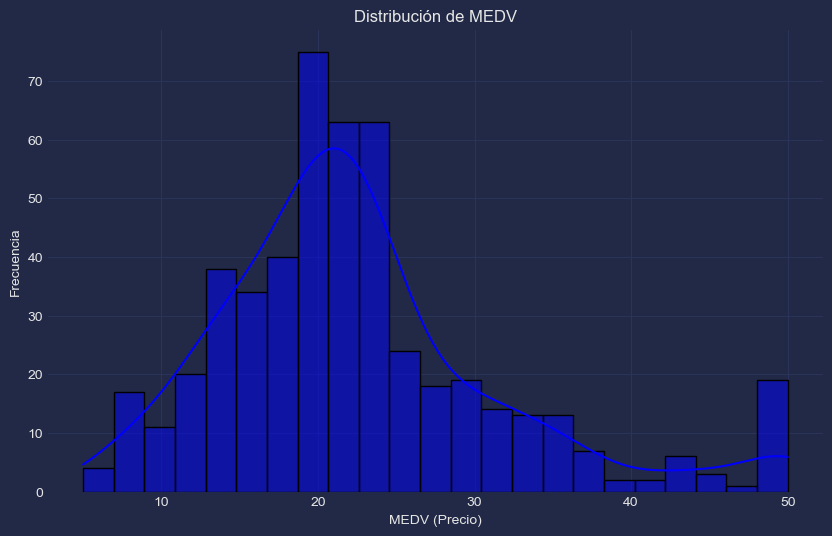

In [5]:
# Visualización de la distribución de la variable objetivo (MEDV)
plt.style.use("cyberpunk")
plt.figure(figsize=(10, 6))
sns.histplot(data['MEDV'], kde=True, color='blue')
plt.title('Distribución de MEDV')
plt.xlabel('MEDV (Precio)')
plt.ylabel('Frecuencia')
plt.show()

In [6]:
plt.figure(figsize=(20, 5))

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

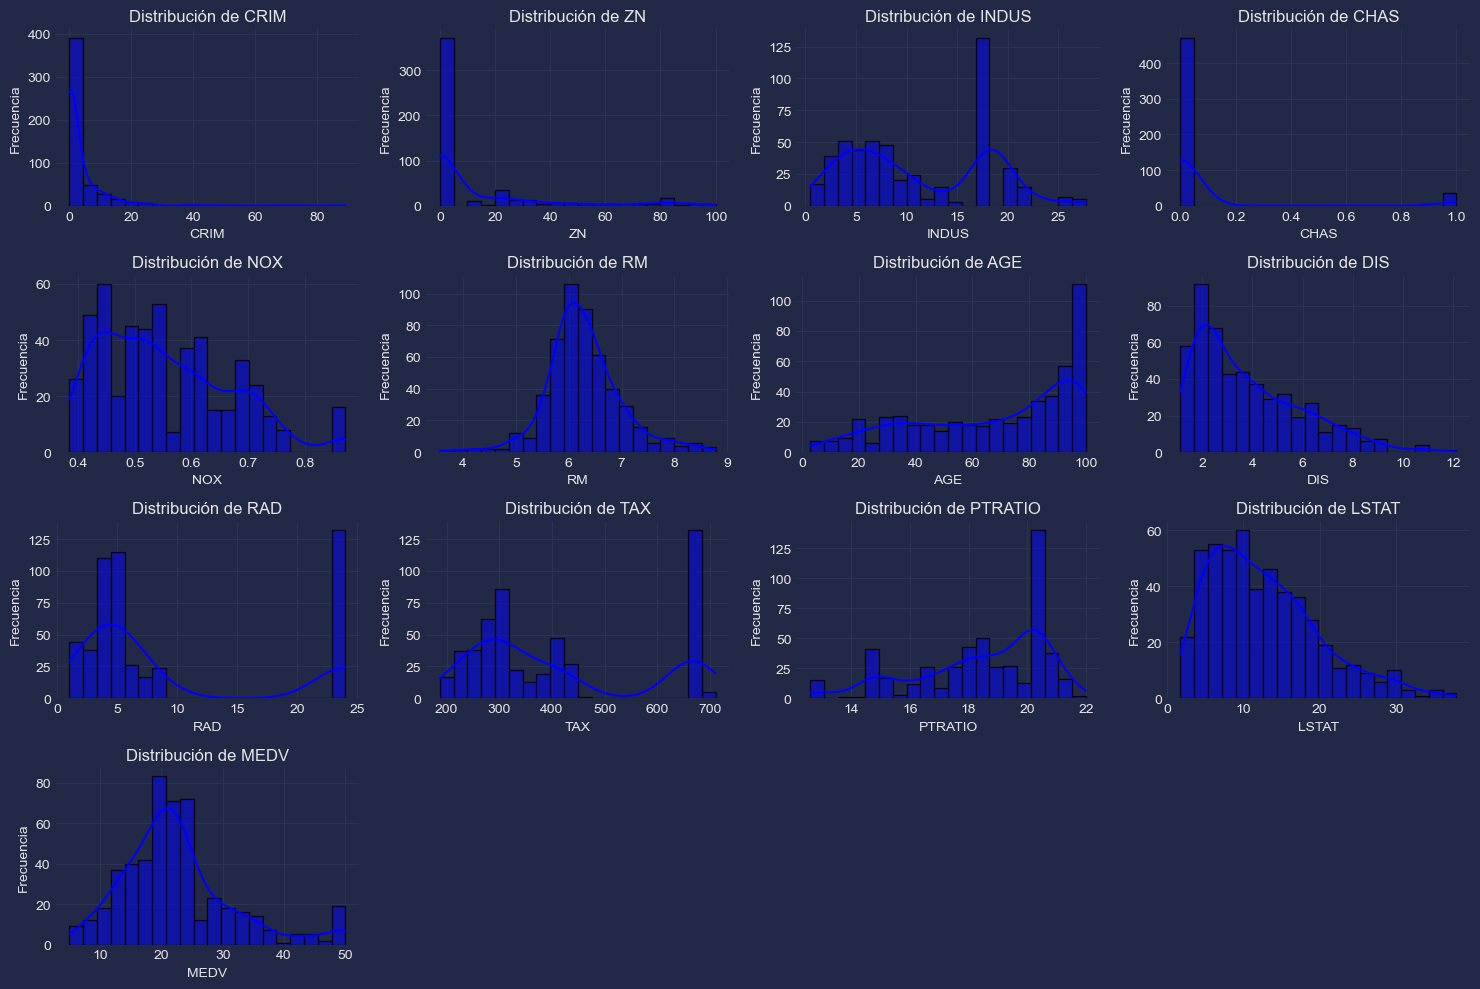

In [7]:
# Visualizar la distribución de cada variable
plt.style.use("cyberpunk")
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data[column], kde=True, color='blue', bins=20)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

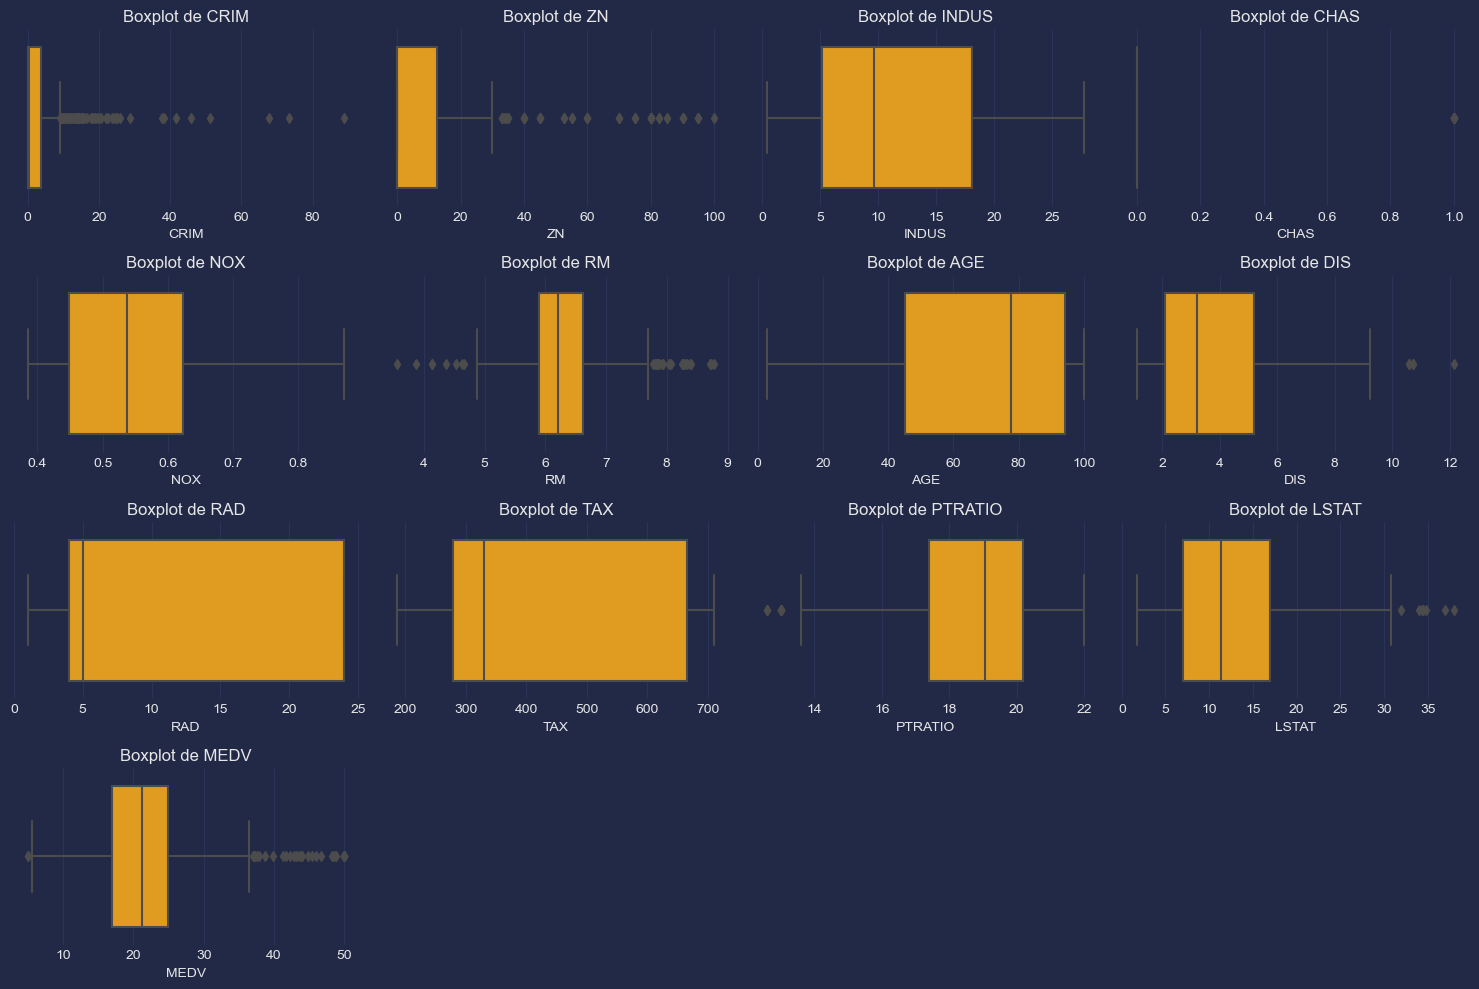

In [8]:
# Visualizar los outliers para cada variable
plt.style.use("cyberpunk")
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=data[column], color='orange')
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

Vemos que tenemos muchos outliers por lo que o podemos hacer una transformación o eliminamos los outliers

In [9]:
# Remover outliers
def remove_outliers(df:pd.DataFrame, column:str):
    df = df.copy()
    q1, q3 = np.percentile(df[column], [25, 75])
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    
    df = df.query(f'{lb}<= {column} <= {ub}')
#     df = df[(df[column] <= ub) & (df[column] >= lb)]
    return df

In [10]:
# Remover outliers en base a los datos de la salida
y_out = remove_outliers(data, 'MEDV')
print(y_out.shape)

# Remover outliers resultantes del paso anterior para datos de feature RM
X_out = remove_outliers(y_out, 'RM')
print(X_out.shape)

# Seleccionar los datos resultantes
y_out = X_out[['MEDV']].values
X_out = X_out.drop(columns='MEDV').values

(466, 13)
(452, 13)


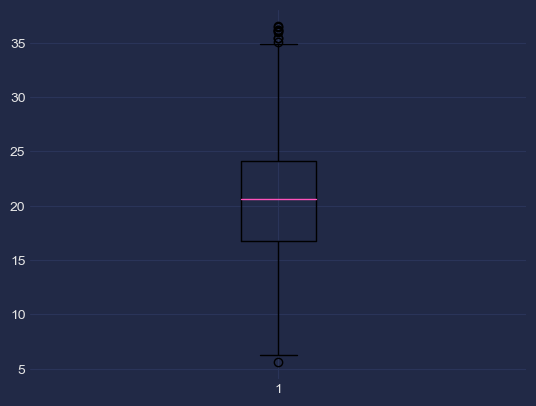

In [11]:
plt.style.use("cyberpunk")
plt.boxplot(y_out)
plt.show()

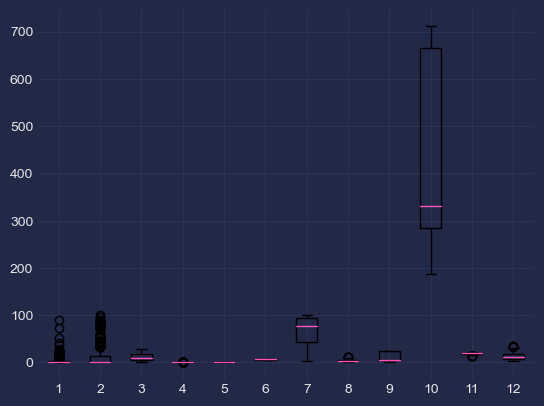

In [12]:
plt.style.use("cyberpunk")
plt.boxplot(X_out)
plt.show()

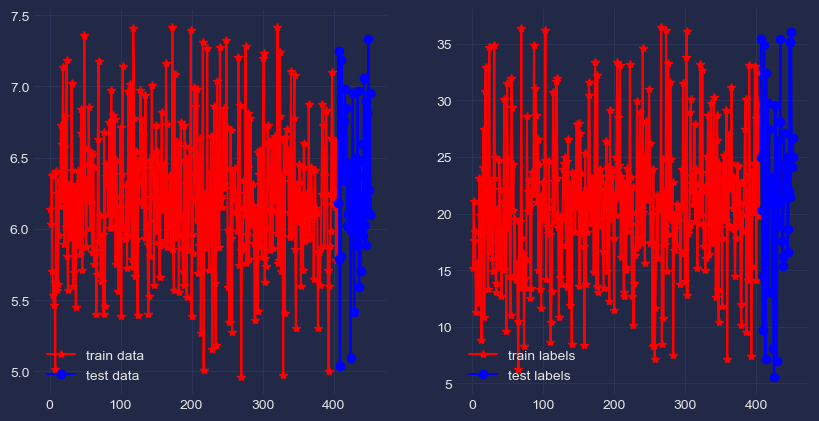

In [13]:
# Visualizo datos de entrenamiento y de prueba
TEST_SIZE = int(0.2 * data.shape[0])
TRAIN_SIZE = data.shape[0] - TEST_SIZE

t = np.arange(1, X_out.shape[0] + 1)
train_data, test_data = X_out[:TRAIN_SIZE], X_out[TRAIN_SIZE:]
train_labels, test_labels = y_out[:TRAIN_SIZE], y_out[TRAIN_SIZE:]


# Visualizazión unicamente de la variable 'RM' y 'MEDV'
fig, ax = plt.subplots(1,2, figsize=(10,5))
plt.style.use("cyberpunk")
ax[0].plot(t[:TRAIN_SIZE], train_data[:, 5], 'r*-', label='train data')
ax[0].plot(t[TRAIN_SIZE:], test_data[:, 5], 'bo-', label='test data')
ax[0].legend()

ax[1].plot(t[:TRAIN_SIZE], train_labels, 'r*-', label='train labels')
ax[1].plot(t[TRAIN_SIZE:], test_labels, 'bo-', label='test labels')
plt.legend()

plt.show()

In [14]:
test_data.shape, test_labels.shape

((47, 12), (47, 1))

In [15]:
# Normalizar los datos de entrenamiento y prueba
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

##### Modelo

Crear una red neuronal MLP con las siguientes características:
* El tamaño de la capa de entrada será el tamaño de nuestra features seleccionadas de serie de tiempo anteriormente.
* Crear un red neuronal secuencial con 2 capas ocultas y 64 neuronas cada una.
* Cada capa tiene que tener una función de activación `ReLu`.
* La capa de salida tiene que ser de una sóla neurona sin función de activación.

In [16]:
# Poner una semilla para replicar resultados
tf.random.set_seed(1234)

# Definir la arquitectura de la red neuronal
model1 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5057 (19.75 KB)
Trainable params: 5057 (19.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# Compilar el modelo
model1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model1_fit = model1.fit(
    train_data, train_labels, 
    validation_split=0.2, 
    shuffle=False,
    epochs=200, 
    batch_size=32, 
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model1.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)




2/2 [==============================] - 0s 7ms/step - loss: 12.1593 - mae: 2.5114
Error cuadrático medio en el conjunto de prueba: 12.159327507019043
Error absoluto medio en el conjunto de prueba: 2.5114402770996094


In [18]:
model1_fit.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

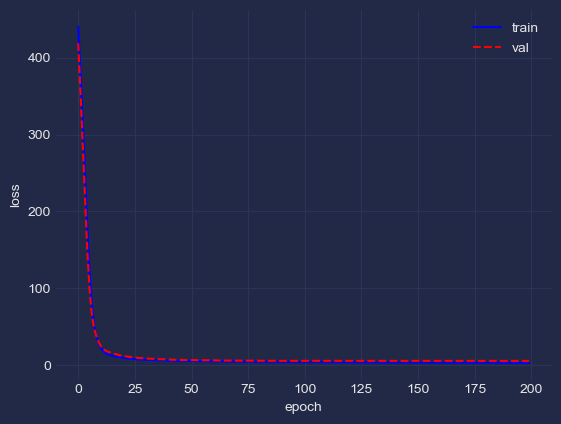

In [19]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.style.use("cyberpunk")
plt.plot(model1_fit.history['loss'], 'b', label='train')
plt.plot(model1_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

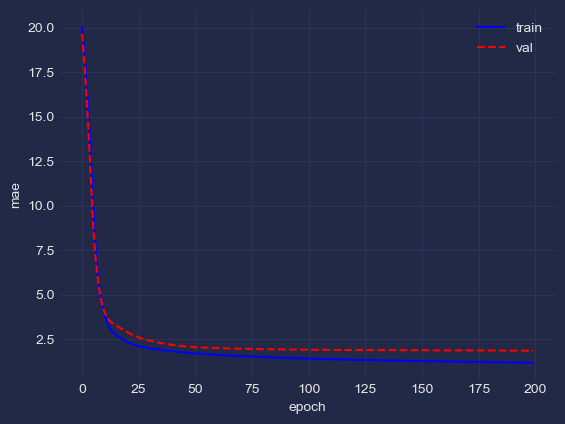

In [20]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.style.use("cyberpunk")
plt.plot(model1_fit.history['mae'], 'b', label='train')
plt.plot(model1_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [21]:
predicted = model1.predict(test_data)

2/2 [==============================] - 0s 4ms/step


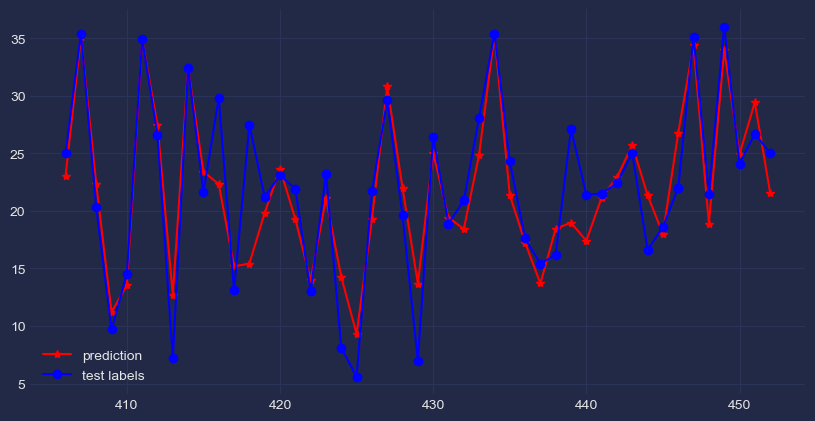

In [22]:
plt.figure(figsize=(10,5))
plt.style.use("cyberpunk")
plt.plot(t[TRAIN_SIZE:], predicted, 'r*-', label='prediction')
plt.plot(t[TRAIN_SIZE:], test_labels, 'bo-', label='test labels')

plt.legend()
plt.show()

#### Estudiante 2: Judith Alejandra Hinojosa Rábago

##### Carga de datos

Se cargan los datos de la misma forma que en la clase y se les aplica las mismas técnicas y transformaciones.

In [1]:
# Código de solución estudiante 2
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Cargar los datos de entrenamiento y prueba
(train_data_judith, train_labels_judith), (test_data_judith, test_labels_judith) = keras.datasets.boston_housing.load_data()

In [3]:
# Obviar la columna -2 por que considera una variable de poco interés
train_data_judith = np.delete(train_data_judith, -2, axis=1)
test_data_judith = np.delete(test_data_judith, -2, axis=1)

In [4]:
columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'LSTAT',
    'MEDV',
]

X = np.vstack([train_data_judith, test_data_judith])
y = np.hstack([train_labels_judith, test_labels_judith]).reshape(-1, 1)
data_judith = pd.DataFrame(np.concatenate((X, y), axis=1), columns=columns)
data_judith

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,14.65,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,5.29,21.9
502,0.07896,0.0,12.83,0.0,0.437,6.273,6.0,4.2515,5.0,398.0,18.7,6.78,24.1
503,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,1.92,50.0
504,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,9.71,26.7


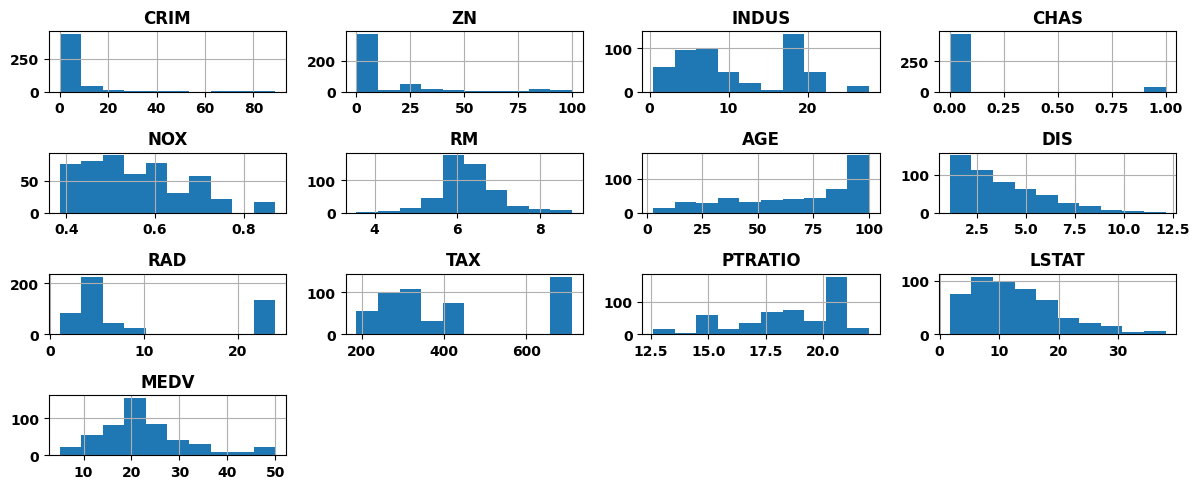

In [5]:
data_judith.hist(figsize=(12, 5))
plt.tight_layout()
plt.show()

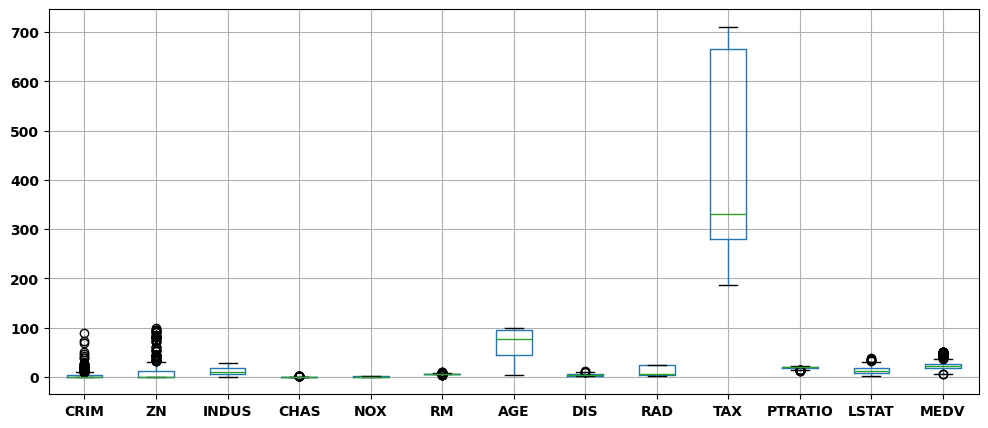

In [6]:
data_judith.boxplot(figsize=(12, 5))
plt.show()

###### Transformación de variables

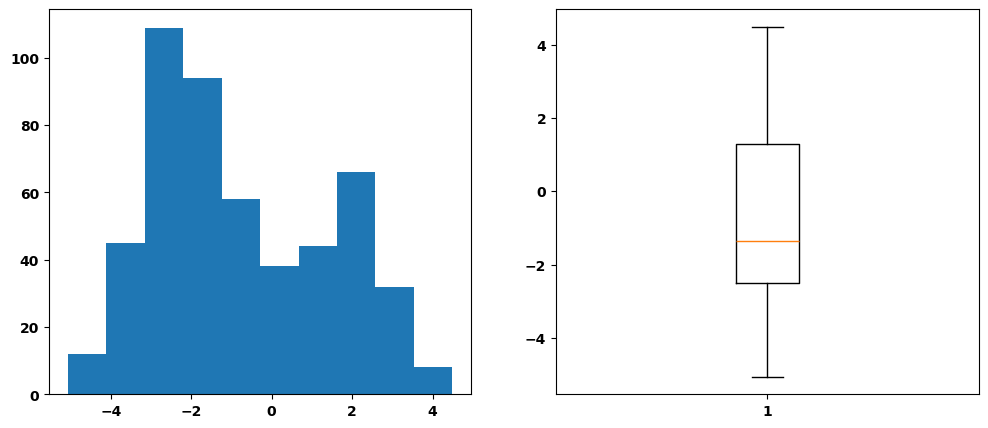

In [7]:
# log(CRIM)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(np.log(data_judith['CRIM']))

ax[1].boxplot(np.log(data_judith['CRIM']))

plt.show()

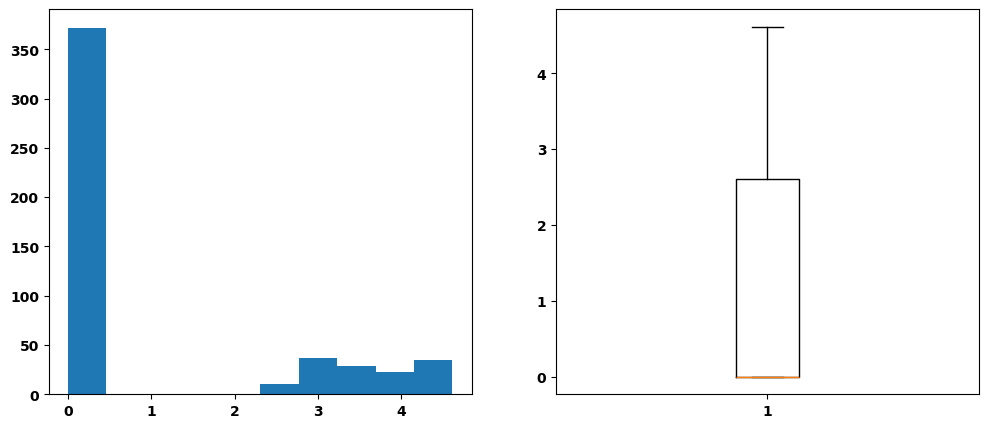

In [8]:
# log(ZN) + 1
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(np.log(data_judith['ZN'] + 1))

ax[1].boxplot(np.log(data_judith['ZN'] + 1))

plt.show()

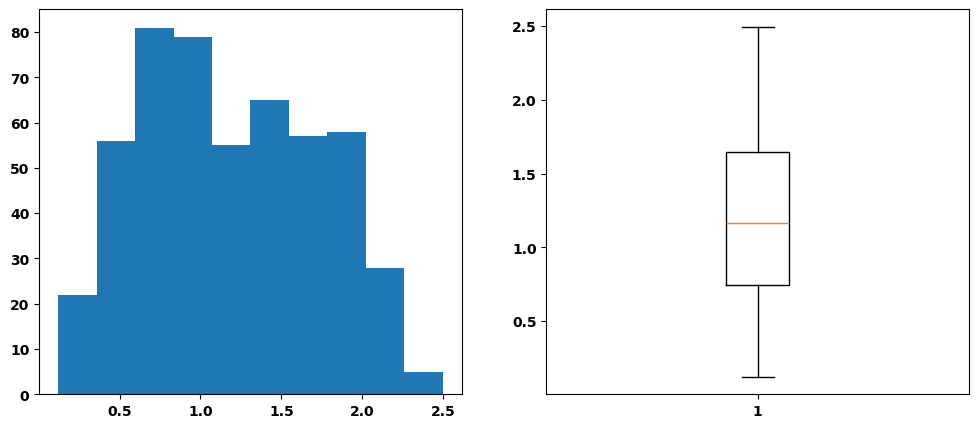

In [9]:
# log(DIS)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(np.log(data_judith['DIS']))

ax[1].boxplot(np.log(data_judith['DIS']))

plt.show()

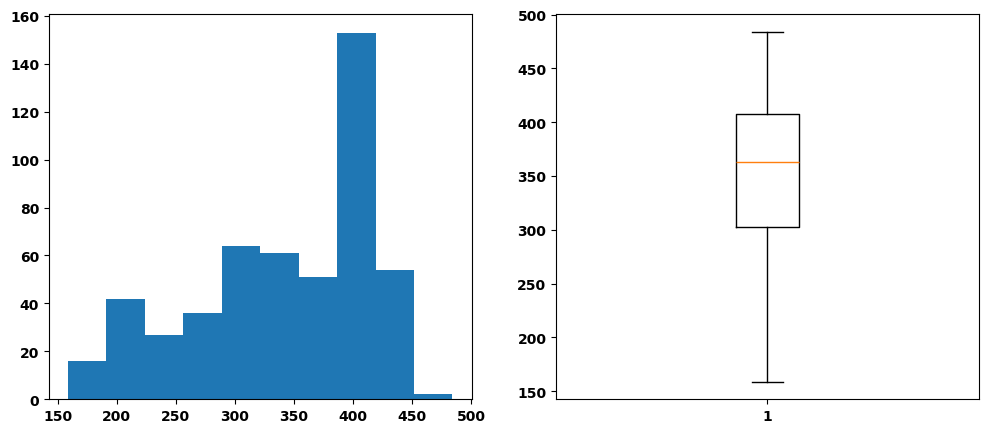

In [10]:
# PRATIO ^ 2
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(data_judith['PTRATIO'] ** 2)

ax[1].boxplot(data_judith['PTRATIO'] ** 2)

plt.show()

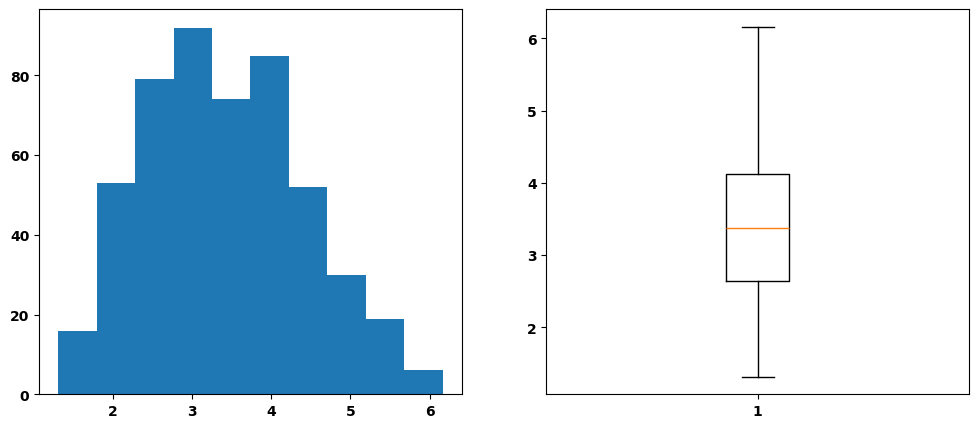

In [11]:
# DIS ^ (1/2)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(data_judith['LSTAT'] ** (1/2))

ax[1].boxplot(data_judith['LSTAT'] ** (1/2))

plt.show()

Transformamos las variables para eliminar outliers.

In [12]:
data_judith['CRIM'] = np.log(data_judith['CRIM'])
data_judith['ZN'] = np.log(data_judith['ZN'] + 1)
data_judith['DIS'] = np.log(data_judith['DIS'])
data_judith['PTRATIO'] = data_judith['PTRATIO'] ** 2
data_judith['LSTAT'] = data_judith['LSTAT'] ** (1/2)

###### Removemos los outliers de las variables `RM` y `MEDV`

Con el propósito de que el modelo ajuste de la mejor forma y que sea con los mismos datos que en la clase.

In [13]:
# Remover outliers
def remove_outliers(df:pd.DataFrame, column:str):
    df = df.copy()
    q1, q3 = np.percentile(df[column], [25, 75])
    iqr = q3 - q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    
    df = df.query(f'{lb}<= {column} <= {ub}')
#     df = df[(df[column] <= ub) & (df[column] >= lb)]
    return df

In [14]:
# Remover outliers en base a los datos de la salida
y_out = remove_outliers(data_judith, 'MEDV')
print(y_out.shape)

# Remover outliers resultantes del paso anterior para datos de feature RM
X_out = remove_outliers(y_out, 'RM')
print(X_out.shape)

# Seleccionar los datos resultantes
y_out = X_out[['MEDV']].values
X_out = X_out.drop(columns='MEDV').values

(466, 13)
(452, 13)


Visualizamos los boxplots finales.

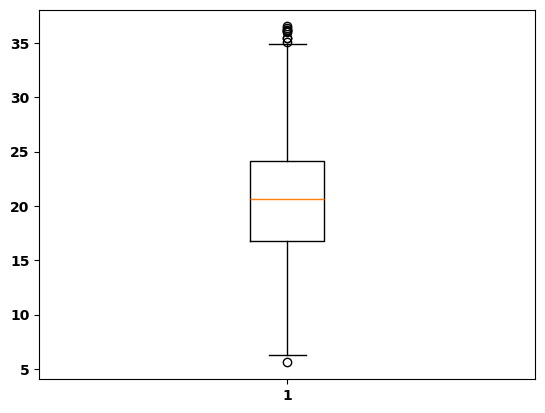

In [15]:
plt.boxplot(y_out)
plt.show()

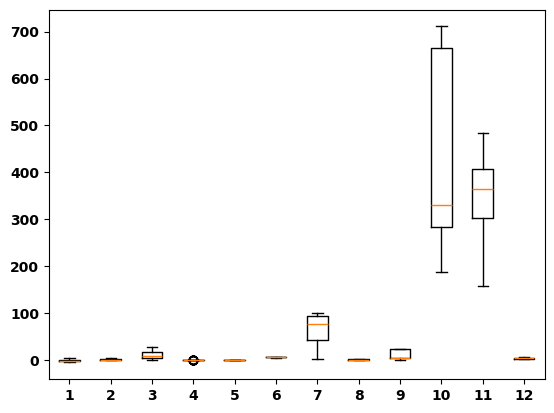

In [16]:
plt.boxplot(X_out)
plt.show()

Disminuimos considerablemente la cantidad de outliers.

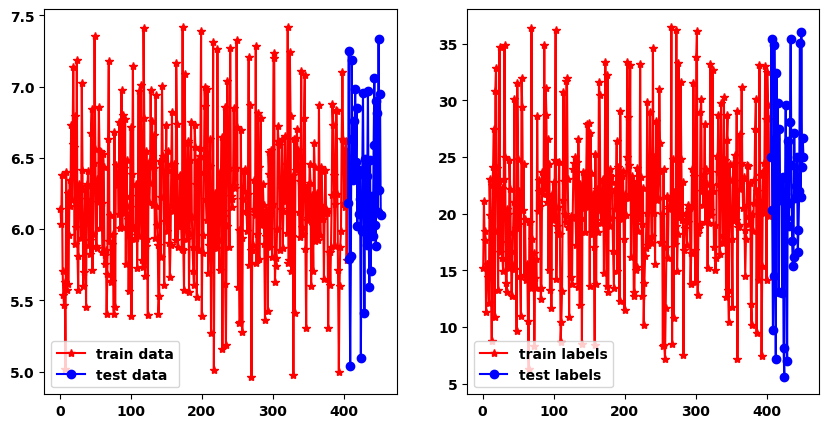

In [17]:
# Visualizo datos de entrenamiento y de prueba
TEST_SIZE = int(0.2 * data_judith.shape[0])
TRAIN_SIZE = data_judith.shape[0] - TEST_SIZE

t = np.arange(1, X_out.shape[0] + 1)
train_data_judith, test_data_judith = X_out[:TRAIN_SIZE], X_out[TRAIN_SIZE:]
train_labels_judith, test_labels_judith = y_out[:TRAIN_SIZE], y_out[TRAIN_SIZE:]


# Visualizazión unicamente de la variable 'RM' y 'MEDV'
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(t[:TRAIN_SIZE], train_data_judith[:, 5], 'r*-', label='train data')
ax[0].plot(t[TRAIN_SIZE:], test_data_judith[:, 5], 'bo-', label='test data')
ax[0].legend()

ax[1].plot(t[:TRAIN_SIZE], train_labels_judith, 'r*-', label='train labels')
ax[1].plot(t[TRAIN_SIZE:], test_labels_judith, 'bo-', label='test labels')
plt.legend()

plt.show()

In [18]:
test_data_judith.shape, test_labels_judith.shape

((47, 12), (47, 1))

In [19]:
# Normalizar los datos de entrenamiento y prueba
mean = train_data_judith.mean(axis=0)
std = train_data_judith.std(axis=0)
train_data_judith = (train_data_judith - mean) / std
test_data_judith = (test_data_judith - mean) / std

In [20]:
train_data_judith.mean(axis=0)

array([-2.63163976e-17, -3.28954970e-17,  1.25002889e-16,  0.00000000e+00,
        2.85094308e-17,  9.29846049e-16,  6.57909941e-17, -5.39486151e-16,
        1.75442651e-17, -7.01770603e-17,  6.35979609e-16, -9.86864911e-17])

In [21]:
train_data_judith.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [22]:
test_data_judith.mean(axis=0)

array([-0.01477899,  0.16520013,  0.0084809 ,  0.13582791, -0.13816658,
        0.22986811, -0.00636536,  0.12877838,  0.036497  ,  0.04828726,
       -0.24503571, -0.07193867])

In [23]:
test_data_judith.std(axis=0)

array([0.96316386, 1.04244018, 0.99622459, 1.23114913, 0.98004097,
       1.08607511, 1.07176245, 1.05610772, 0.98781478, 1.0578546 ,
       0.99236647, 1.00797016])

##### Modelo

Crear una red neuronal MLP con las siguientes características:
* El tamaño de la capa de entrada será el tamaño de nuestra features seleccionadas de serie de tiempo anteriormente.
* Crear un red neuronal secuencial con 2 capas ocultas y 64 neuronas cada una.
* Cada capa tiene que tener una función de activación `ReLu`.
* La capa de salida tiene que ser de una sóla neurona sin función de activación.

In [24]:
# Poner una semilla para replicar resultados
tf.random.set_seed(5465)

# Definir la arquitectura de la red neuronal
model1_judith = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data_judith.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model1_judith.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5057 (19.75 KB)
Trainable params: 5057 (19.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Compilar el modelo
model1_judith.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model1_judith_fit = model1_judith.fit(
    train_data_judith, train_labels_judith, 
    validation_split=0.2, 
    shuffle=False,
    epochs=200, 
    batch_size=32, 
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model1_judith.evaluate(test_data_judith, test_labels_judith)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)




2/2 [==============================] - 0s 5ms/step - loss: 14.5848 - mae: 2.7009
Error cuadrático medio en el conjunto de prueba: 14.584817886352539
Error absoluto medio en el conjunto de prueba: 2.7009224891662598


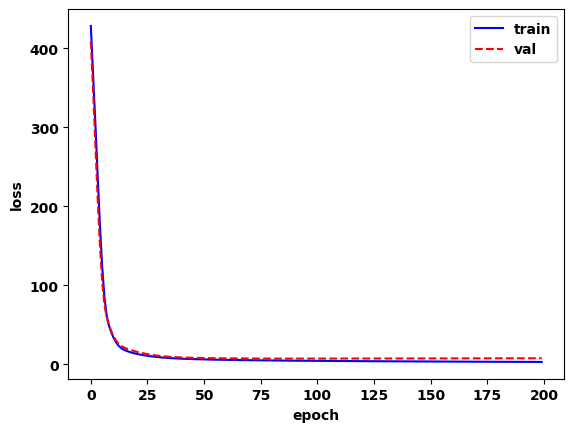

In [26]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model1_judith_fit.history['loss'], 'b', label='train')
plt.plot(model1_judith_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

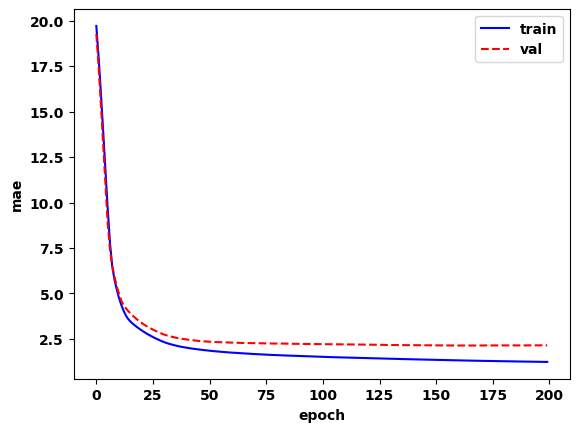

In [27]:
# Graficar métricas de error
plt.plot(model1_judith_fit.history['mae'], 'b', label='train')
plt.plot(model1_judith_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [28]:
predicted = model1_judith.predict(test_data_judith)

2/2 [==============================] - 0s 3ms/step


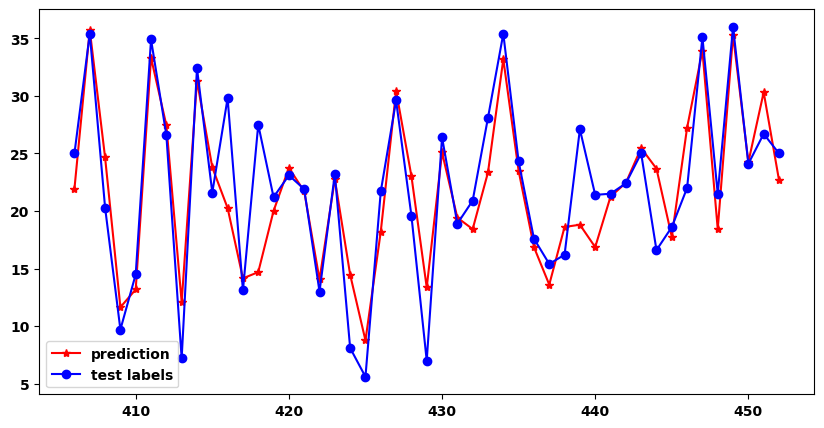

In [29]:
plt.figure(figsize=(10,5))
plt.plot(t[TRAIN_SIZE:], predicted, 'r*-', label='prediction')
plt.plot(t[TRAIN_SIZE:], test_labels_judith, 'bo-', label='test labels')

plt.legend()
plt.show()

### Ejercicio 2: Construir una red neuronal MLP multivariada, pero en este caso sólo considerar las variables adecuadas y descartar aquellas que no aportan mucha información o que son redundantes para cuantificar el efecto de estas variables redundantes.

**Nota**: Para poder saber cuales variables incluir en el modelo y cuales rechazar una opción es analizar la correlación de pearson y la otra usando pruebas estadísiticas con las siguientes paqueterías
```
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
```

#### Estudiante 1: Flavio Maximiliano Herrada Ávalos

In [52]:
# Seleccionar las características más representativas
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

selector = SelectKBest(score_func=f_regression, k=7)
X_new = selector.fit(train_data, train_labels)

In [53]:
# Obtener el índice de las características seleccionadas
selected_features_index = selector.get_support(indices=True)
selected_features_index

array([ 2,  4,  5,  6,  8,  9, 11], dtype=int64)

In [54]:
# Obtener los nombres de las características seleccionadas
selected_features_names = [columns[int(i[1:])] for i in X_new.get_feature_names_out(input_features=None)]

# Mostrar las características seleccionadas
print("Características seleccionadas:")
print(selected_features_names)

Características seleccionadas:
['INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'LSTAT']


In [55]:
train_selected_data = X_new.transform(train_data)
test_selected_data = X_new.transform(test_data)
train_selected_data.shape

(405, 7)

In [56]:
# Poner una semilla para replicar resultados
tf.random.set_seed(1234)

# Definir la arquitectura de la red neuronal
model2 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_selected_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                512       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
# Compilar el modelo
model2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model2_fit = model2.fit(
    train_selected_data, train_labels, 
    validation_split=0.2, 
    shuffle=False,
    epochs=200, 
    batch_size=32, 
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model2.evaluate(test_selected_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

2/2 [==============================] - 0s 4ms/step - loss: 15.9645 - mae: 2.9718
Error cuadrático medio en el conjunto de prueba: 15.964505195617676
Error absoluto medio en el conjunto de prueba: 2.971816062927246


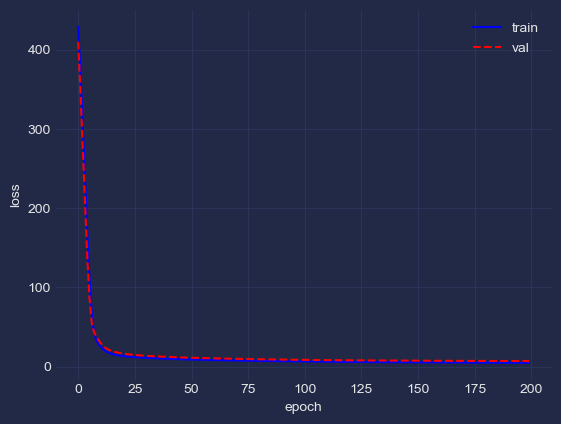

In [58]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.style.use("cyberpunk")
plt.plot(model2_fit.history['loss'], 'b', label='train')
plt.plot(model2_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

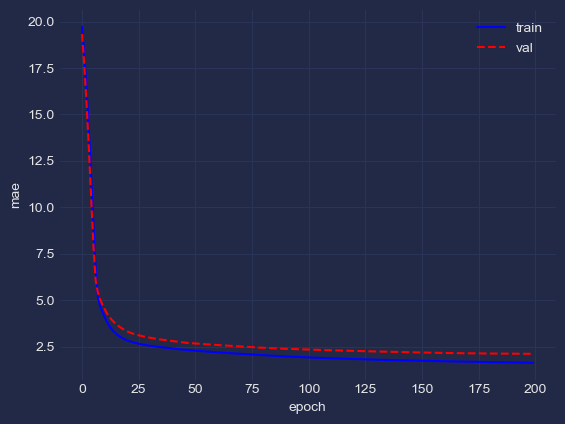

In [59]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.style.use("cyberpunk")
plt.plot(model2_fit.history['mae'], 'b', label='train')
plt.plot(model2_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [60]:
predicted = model2.predict(test_selected_data)

2/2 [==============================] - 0s 3ms/step


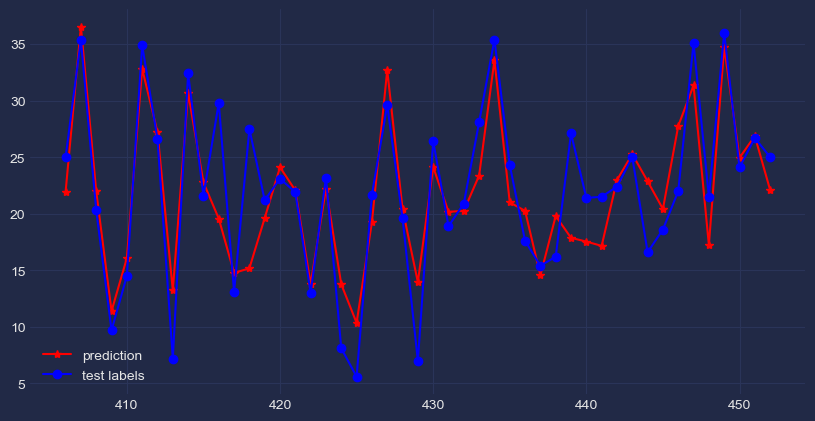

In [61]:
plt.figure(figsize=(10,5))
plt.style.use("cyberpunk")
plt.plot(t[TRAIN_SIZE:], predicted, 'r*-', label='prediction')
plt.plot(t[TRAIN_SIZE:], test_labels, 'bo-', label='test labels')

plt.legend()
plt.show()

#### Estudiante 2: Judith Alejandra Hinojosa Rábago


##### Selección de variables
Con el método de selección de variables `SelectKBest` se escogen las 8 variables más representativas de acuerdo con la prueba `f_regression` (pruebas de regresión lineal univariante).

In [30]:
# Código de solución estudiante 2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [31]:
k_best = SelectKBest(score_func=f_regression, k=8)
res = k_best.fit(train_data_judith, train_labels_judith)
res.get_feature_names_out(input_features=None)

array(['x0', 'x2', 'x4', 'x5', 'x6', 'x8', 'x9', 'x11'], dtype=object)

In [32]:
# el nombre de las columnas
[columns[int(i[1:])] for i in res.get_feature_names_out(input_features=None)]

['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'LSTAT']

Con las 8 variables más significativas se genera otro modelo.

In [33]:
train_selected_data_judith = res.transform(train_data_judith)

In [34]:
test_selected_data_judith = res.transform(test_data_judith)

In [35]:
train_selected_data_judith.shape

(405, 8)

##### Modelo

In [36]:
# Poner una semilla para replicar resultados
tf.random.set_seed(5465)

# Definir la arquitectura de la red neuronal
model2_judith = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_selected_data_judith.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model2_judith.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                576       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4801 (18.75 KB)
Trainable params: 4801 (18.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# Compilar el modelo
model2_judith.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model2_judith_fit = model2_judith.fit(
    train_selected_data_judith, train_labels_judith, 
    validation_split=0.2, 
    shuffle=False,
    epochs=200, 
    batch_size=32, 
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model2_judith.evaluate(test_selected_data_judith, test_labels_judith)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

2/2 [==============================] - 0s 5ms/step - loss: 16.8104 - mae: 3.0355
Error cuadrático medio en el conjunto de prueba: 16.810440063476562
Error absoluto medio en el conjunto de prueba: 3.035543918609619


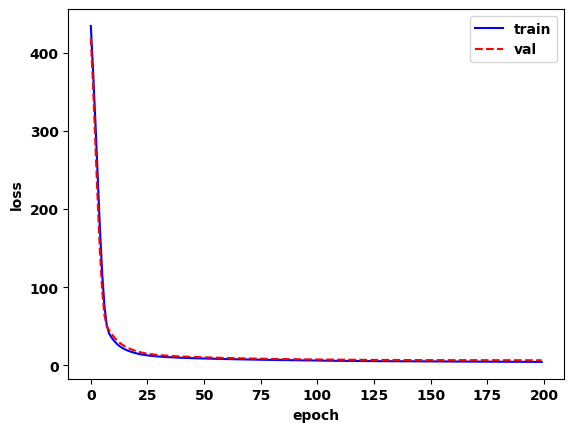

In [38]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model2_judith_fit.history['loss'], 'b', label='train')
plt.plot(model2_judith_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

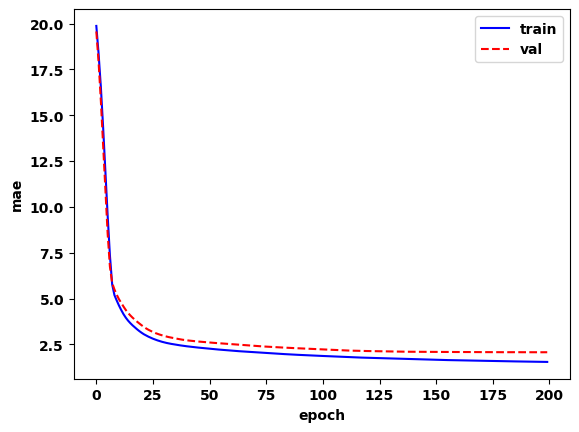

In [39]:
# Graficar métricas de error
plt.plot(model2_judith_fit.history['mae'], 'b', label='train')
plt.plot(model2_judith_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [40]:
predicted = model2_judith.predict(test_selected_data_judith)

2/2 [==============================] - 0s 4ms/step


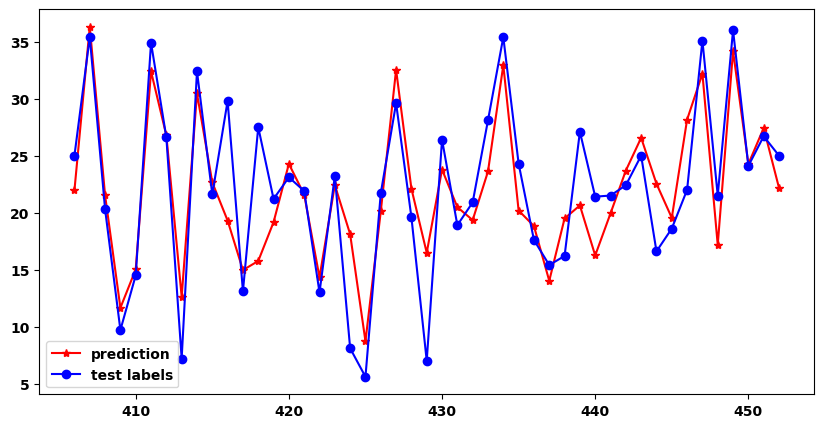

In [41]:
plt.figure(figsize=(10,5))
plt.plot(t[TRAIN_SIZE:], predicted, 'r*-', label='prediction')
plt.plot(t[TRAIN_SIZE:], test_labels_judith, 'bo-', label='test labels')

plt.legend()
plt.show()

### Ejercicio 3: Luego del paso 2, crear el mismo modelo pero en este caso implementar técnicas de regularización `EarlyStoppin` y `dropout`. Investigar como se pueden implementar estas estrategias en tensorflow.

#### Estudiante 1: Flavio Maximiliano Herrada Ávalos

In [74]:
# Código de solución estudiante 1

# Poner una semilla para replicar resultados
tf.random.set_seed(1234)

# Definir la arquitectura de la red neuronal
model3 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_selected_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1)
])


In [75]:
ES = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', patience=10, restore_best_weights=True)

# Compilar el modelo
model3.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model3_fit = model3.fit(
    train_selected_data, train_labels, 
    validation_split=0.2, 
    shuffle=False,
    callbacks=[ES],
    epochs=200, 
    batch_size=32, 
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model3.evaluate(test_selected_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

2/2 [==============================] - 0s 4ms/step - loss: 19.3519 - mae: 3.5774
Error cuadrático medio en el conjunto de prueba: 19.3519229888916
Error absoluto medio en el conjunto de prueba: 3.577420473098755


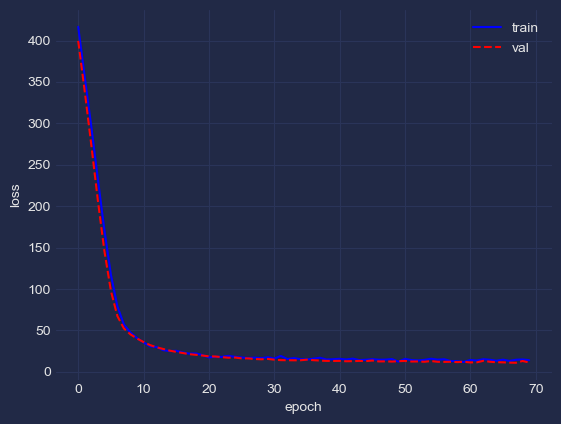

In [76]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.style.use("cyberpunk")
plt.plot(model3_fit.history['loss'], 'b', label='train')
plt.plot(model3_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

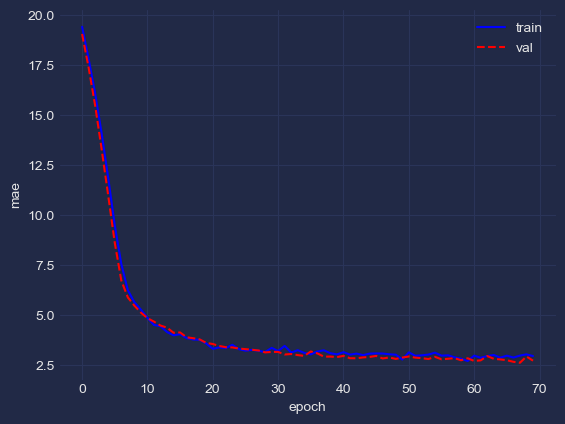

In [77]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.style.use("cyberpunk")
plt.plot(model3_fit.history['mae'], 'b', label='train')
plt.plot(model3_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [78]:
predicted = model3.predict(test_selected_data)

2/2 [==============================] - 0s 4ms/step


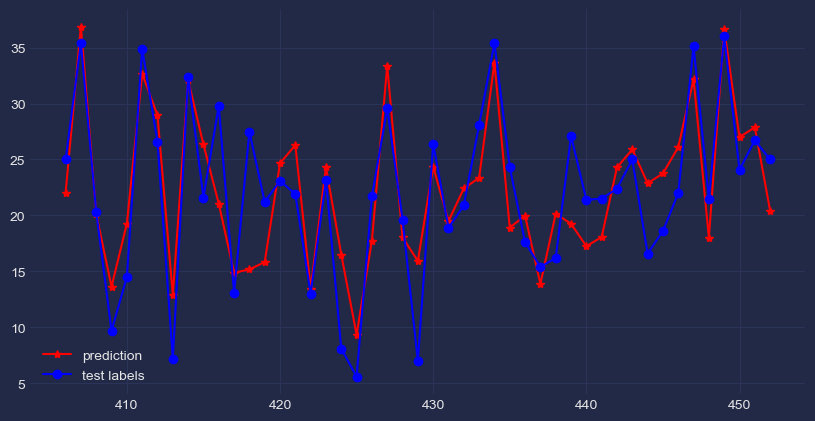

In [79]:
plt.figure(figsize=(10,5))
plt.style.use("cyberpunk")
plt.plot(t[TRAIN_SIZE:], predicted, 'r*-', label='prediction')
plt.plot(t[TRAIN_SIZE:], test_labels, 'bo-', label='test labels')

plt.legend()
plt.show()

In [80]:
len(model3_fit.history['mae'])

70

Con el ES mi modelo dejó de correr en la época 70!

#### Estudiante 2: Judith Alejandra Hinojosa Rábago

Aplicamos:
- `EarlyStopping`: parar el entrenamiento si cierta métrica deja de mejorar, en este caso es si la función de pérdida deja de disminuir en los datos de entrenamiento.
- `Dropout`: es una capa en el modelo que aleatoriamente durante el entrenamiento (mientras no se especifique que también se active en otros contextos) desactiva ciertas entradas a la capa (valores de las neuronas de la capa anterior), mandando los valores a 0 con cierta frecuencia en cada paso. De acuerdo con la documentación de`TensorFlow` las entradas que no se desactivan se escalan en $\frac{1}{1 - \text{rate}}$ para que la suma de las entradas permanezca sin cambio.

Ambas técnicas pueden ayudar a evitar el sobreajuste.


##### Modelo

In [42]:
# Código de solución estudiante 2
# Poner una semilla para replicar resultados
tf.random.set_seed(5465)

# Definir la arquitectura de la red neuronal
model3_judith = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_selected_data_judith.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2), # agrega un dropout al 2% de las entradas
    keras.layers.Dense(1)
])

model3_judith.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                576       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4801 (18.75 KB)
Trainable params: 4801 (18.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
# Callback que monitorea el loss en el set de entrenamiento, si en 10 épocas no disminuye el valor para la
# ejecución del entrenamiento del modelo y retorna a los pesos que dieron el mejor resultado
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', patience=10, restore_best_weights=True)

# Compilar el modelo
model3_judith.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model3_judith_fit = model3_judith.fit(
    train_selected_data_judith, train_labels_judith, 
    validation_split=0.2, 
    shuffle=False,
    callbacks=[callback], # aquí se coloca el Early Stopping
    epochs=200, 
    batch_size=32, 
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model3_judith.evaluate(test_selected_data_judith, test_labels_judith)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

2/2 [==============================] - 0s 5ms/step - loss: 20.6714 - mae: 3.5676
Error cuadrático medio en el conjunto de prueba: 20.671358108520508
Error absoluto medio en el conjunto de prueba: 3.5676465034484863


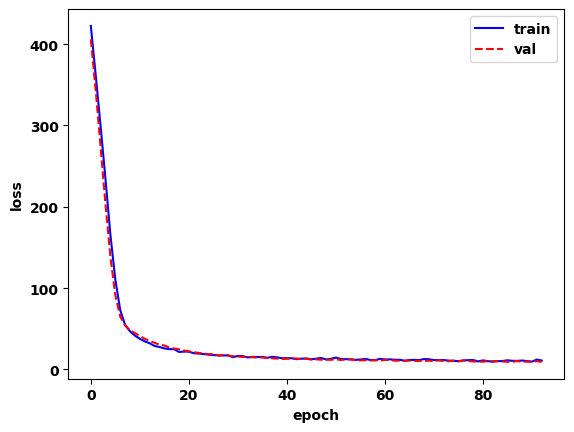

In [44]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model3_judith_fit.history['loss'], 'b', label='train')
plt.plot(model3_judith_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

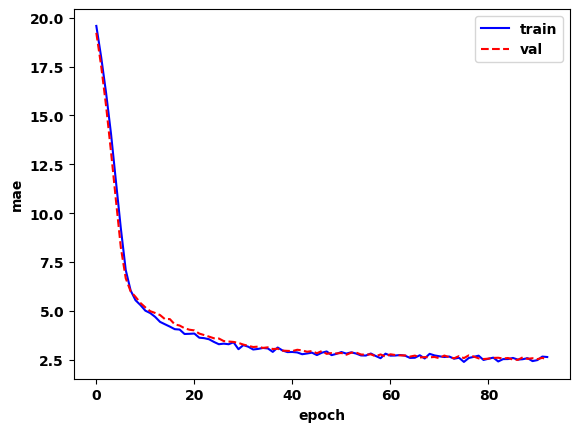

In [45]:
# Graficar métricas de error
plt.plot(model3_judith_fit.history['mae'], 'b', label='train')
plt.plot(model3_judith_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [46]:
len(model3_judith_fit.history['mae'])

93

Terminó en 107 épocas menos el entrenamiento de acuerdo al EarlyStopping.

In [47]:
predicted = model3_judith.predict(test_selected_data_judith)

2/2 [==============================] - 0s 3ms/step


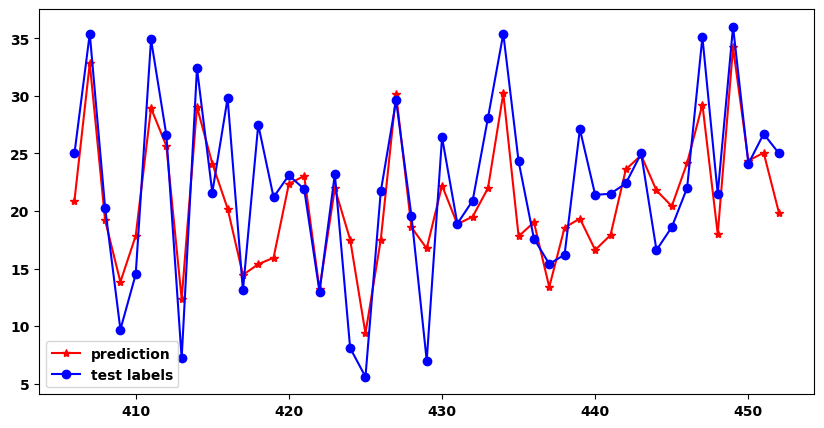

In [48]:
plt.figure(figsize=(10,5))
plt.plot(t[TRAIN_SIZE:], predicted, 'r*-', label='prediction')
plt.plot(t[TRAIN_SIZE:], test_labels_judith, 'bo-', label='test labels')

plt.legend()
plt.show()

Estos 3 escenarios multivariados tuvieron un mejor desempeño que el primer escenario, para este caso en especial, el modelo que mejor se desempeñó fue el que tenía acceso a todos los datos y al que no se le aplicaban técnicas de regularización, entre más restricciones se le aplicaban, peor se desempeñaba en test.

Sin embargo el objetivo de disminuir la densidad de datos de entrada es que, además de que puede afectar por la redundacia de la información, en modelos más complejo tener una gran cantidad de variables pudiera no ser viable computacionalmente.

También nuestro objetivo es hacer un modelo que sea capaz de generalizar, no de sobreajustar. El mejor modelo es el que en producción refleje de la forma más cercana la realidad.